<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="600" height="200"/>
</p></center>

<h1><center><font size=8>AllLife Bank Customer Segmentation</center></font></h1>
<h1><center>Analitis, Iraklis - Project 6</center></h1>

#Introduction#

## Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


### Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).
 
**Data Dictionary**
- `Sl_No`: Primary key of the records
- `Customer Key`: Customer identification number
- `Average Credit Limit`: Average credit limit of each customer for all credit cards
- `Total credit cards`: Total number of credit cards possessed by the customer
- `Total visits bank`: Total number of visits that customer made (yearly) personally to the bank
- `Total visits online`: Total number of visits or online logins made by the customer (yearly)
- `Total calls made`: Total number of calls made by the customer to the bank or its customer service department (yearly)

### Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

### Read the dataset

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read excel file to construct DataFrame object
data = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/UTAustinAIMLProjects/Project6/CreditCardCustomerData.xlsx')

### View the random 10 rows of the dataset.

In [4]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


In [5]:
data.shape

(660, 7)

* The dataset has 660 rows and 7 columns 

In [6]:
# copying the data to another variable to avoid any changes to original data
df1 = data.copy()

### Check the data types of the columns for the dataset.

In [7]:
# checking datatypes and number of non-null values for each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- All variables are numeric integers.
- No missing values in any of the columns.

###  Let's check for duplicate values in the set. 

In [8]:
df1.duplicated().sum()

0

- No duplicate values in the set.

###   Let's check for missing values in the set.

In [9]:
df1.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- No null values in any of the columns.

In [10]:
df1.skew()

Sl_No                  0.000000
Customer Key           0.051462
Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

- `Avg_Credit_Limit` and `Total_visits_online` are heavily right-skewed.`Total_calls_made` is moderately right-skewed.
- All other columns are slightly right-skewed and approximately normal; `Sl_No` and `Customer Key` as it is a randomly assigned identifier and evenly distributed.

### Summary of the dataset.

In [11]:
# Let's look at the statistical summary of the data
df1.describe(include="all").T### Summary of the dataset.

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


**Observations**

- We see the skews already identified represented here as well.
- `Avg_Credit_Limit` has a significantly larger standard deviations than the other columns, we should keep this in mind when developing our clusters.
- `Sl_No` and `Customer Key` as already stated are identifiers and evenly distributed.
- The other columns are of a significantly smaller range of integers. We will see how these differences in ranges and standard deviations will effect both of our clustering methods.

In [12]:
df1 = df1.drop(columns= ['Sl_No', 'Customer Key'])

#Problem Definition#

We have a set of data from the business and they would like to identify segments of the existing customers represented in this set.
- How can we divide up their customers in a meaningful way to provide insight to the business?
- How will the two clustering methods we will be using choose these groups when optimized?
- What will these groups mean to the business? And how can they use the models that we provide to improve the business?
- Will these groups have marketing implications, sales implications, etc.?

#EDA#

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

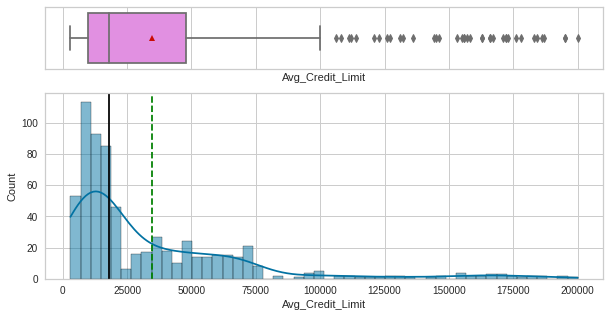

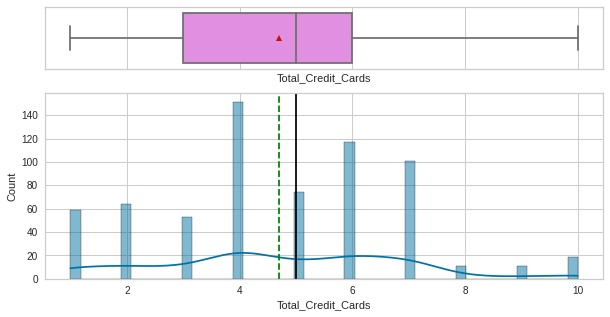

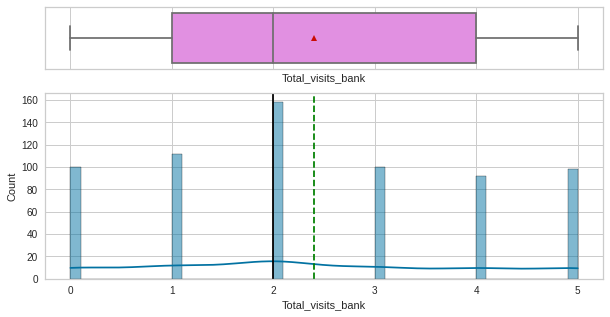

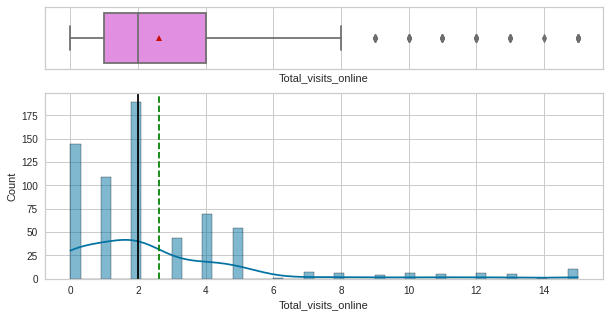

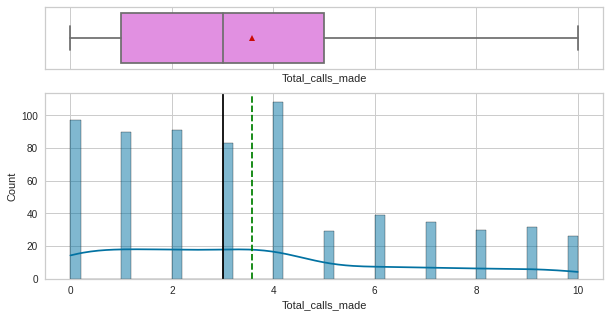

In [14]:
# selecting columns and plotting
num_cols = df1.columns.tolist()

for item in num_cols:
    histogram_boxplot(df1, item, bins=50, kde=True, figsize=(10, 5))

**Observations**

- We see the already noted skews, the most interesting of which are the heavy right-skews of `Avg_Credit_Limit` and `Total_visits_online`.
- `Total_Credit_Cards` is also interesting as we see the primary mode at 4 cards and a secondary mode at 6 cards, for some reason 5 cards was not as popular to the customers.
- The other distributions are pretty even and normal.

### Bivariate Analysis

**Let's check for correlations.**

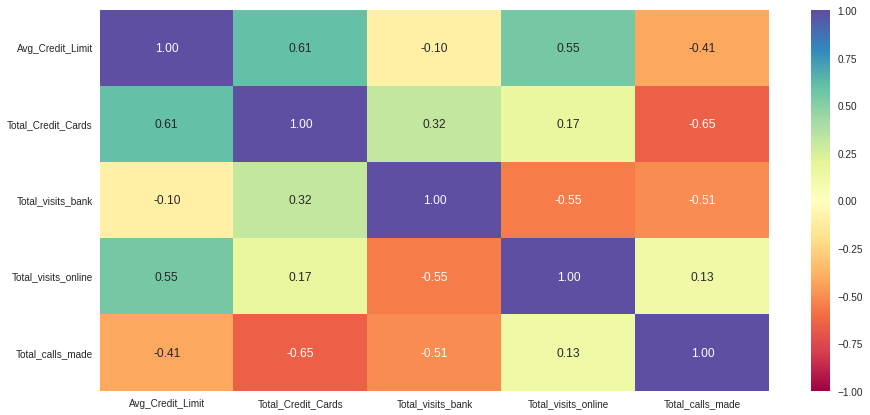

In [15]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

- We see some moderate positive correlations between `Avg_Credit_Limit` and both `Total_Credit_Cards` and `Total_visits_online`.
- We also see some moderate negative correlations between `Total_calls_made` with `Avg_Credit_Limit`, `Total_Credit_Cards` and `Total_visits_bank`. We also see a moderate negative correlation between `Total_visits_bank` and `Total_visits_online`.

# Data Preprocessing

### **Let's scale the data.**

In [16]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df1),
    columns=df1.columns,
)
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


# K-Means Clustering 

In [17]:
num_col = subset_scaled_df.columns.tolist()

Number of Clusters: 1 	Average Distortion: 2.006922226250361
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9909060933486542


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

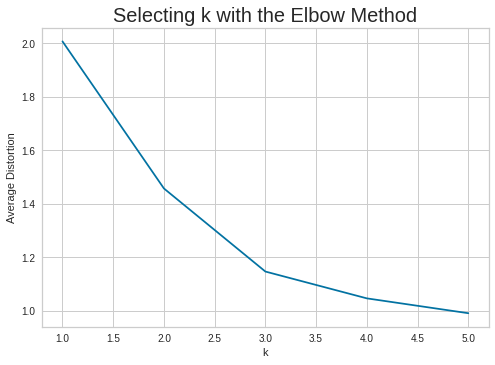

In [18]:
clusters = range(1, 6)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k)  # Initialize KMeans
    model.fit(subset_scaled_df)  # Fit kMeans on the data
    prediction = model.predict(subset_scaled_df)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1))
        / subset_scaled_df.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

**The elbow is seen at k=3** 

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.27239829454176767
For n_clusters = 6, silhouette score is 0.25545029453623114
For n_clusters = 7, silhouette score is 0.24853018035379915
For n_clusters = 8, silhouette score is 0.2269344482628141
For n_clusters = 9, silhouette score is 0.22141684486482419


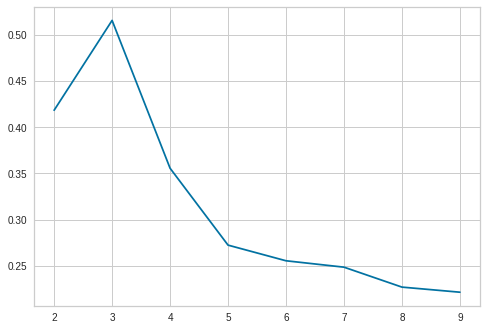

In [19]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 10))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((subset_scaled_df))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**We also see the silhouette score optimized at k=3**

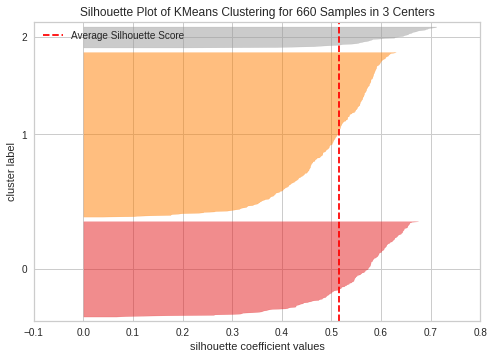

In [20]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

* **We see the silhouette score of all three clusters is greater than the average computed above, k=3 seems to be a valid selection.**

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [22]:
# adding kmeans cluster labels to the original dataframe
dfK = df1.copy()
dfK["K_means_segments"] = kmeans.labels_

# Hierarchical Clustering

### Let's find the Cophenetic correlation for different distances with different linkage methods.

In [23]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [24]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [25]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [26]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


**We see that the cophenetic correlation is still maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

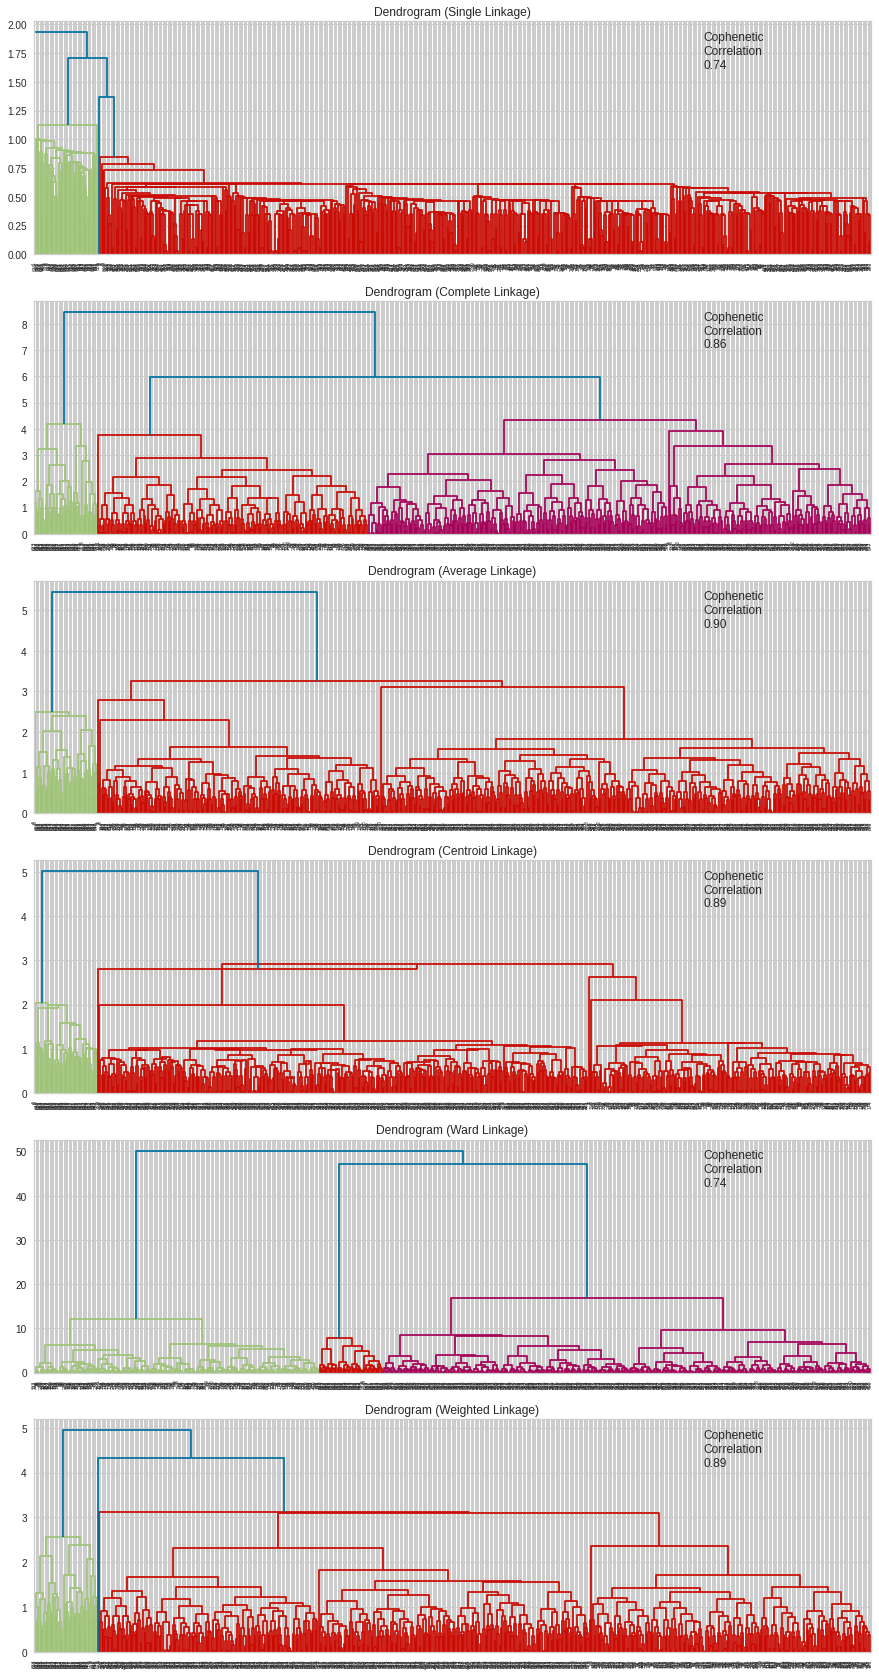

In [27]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average, centroid, and weighted linkage methods with Euclidean distance.
- We will use average linkage with Euclidean distance.
- 2 appears to be the appropriate number of clusters from the dendrogram for Centroid linkage based on distance.

**Lets visualize the dendrogram cut for average link in the below plot**

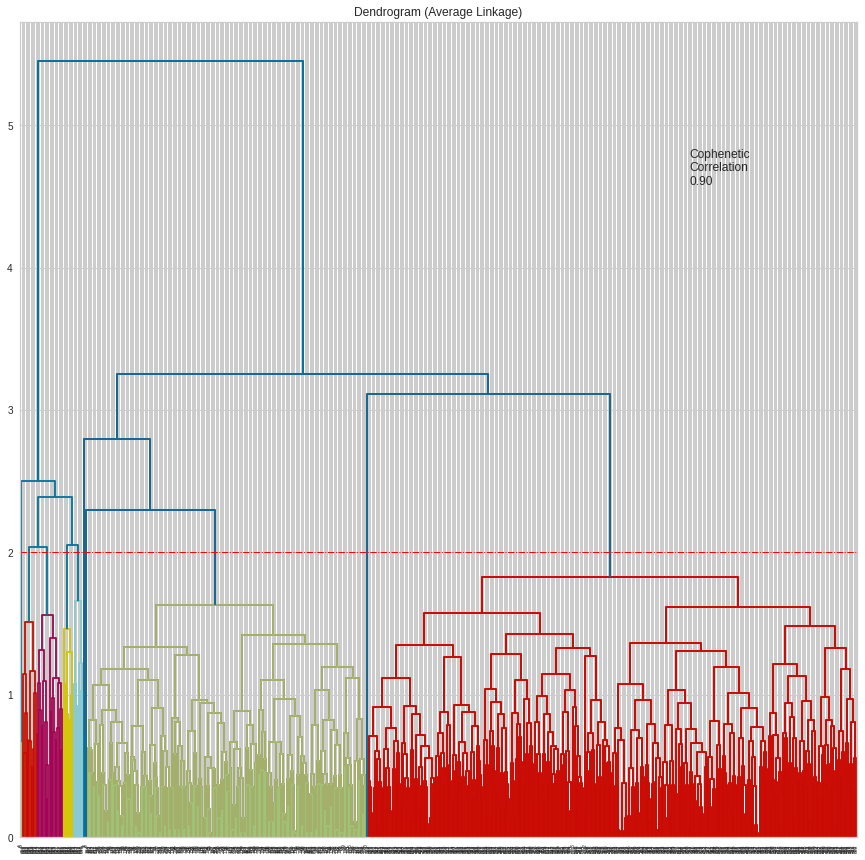

In [28]:
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=2)
plt.axhline(y=2, c="red", lw=1, linestyle="dashdot")

In [29]:
HCmodel = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average')

In [30]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
dfH = df1.copy()
dfH["HC_Clusters"] = HCmodel.labels_

# Cluster Profiling: K-Means

In [31]:
cluster_profile1 = dfK.groupby("K_means_segments").mean()

In [32]:
cluster_profile1["count_in_each_segment"] = (
    dfK.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [33]:
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e270aae10>,
      dtype=object)

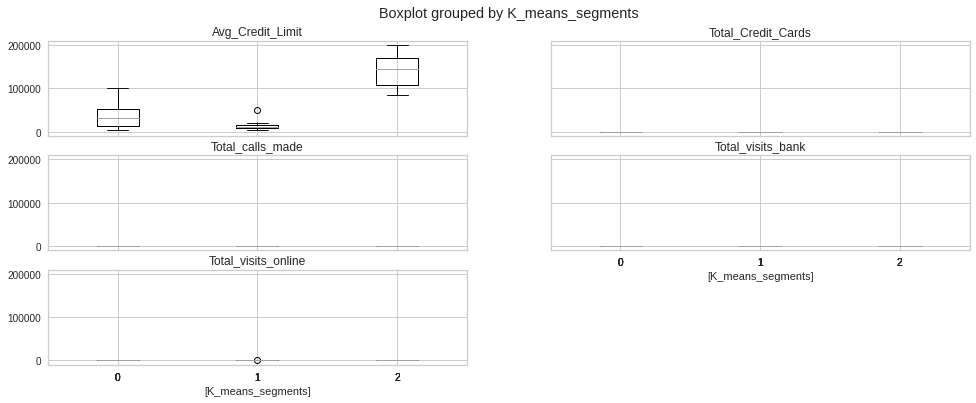

In [34]:
dfK.boxplot(by='K_means_segments', layout=(3,2), figsize=(16,6))

# Cluster Profiling: Hierarchical

In [35]:
cluster_profile2 = dfH.groupby("HC_Clusters").mean()

In [36]:
cluster_profile2["count_in_each_segments"] = (
    dfH.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [37]:
# let's display cluster profiles
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,25847.540984,4.375410,2.550820,1.926230,3.788525,610
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e21f3fa10>,
      dtype=object)

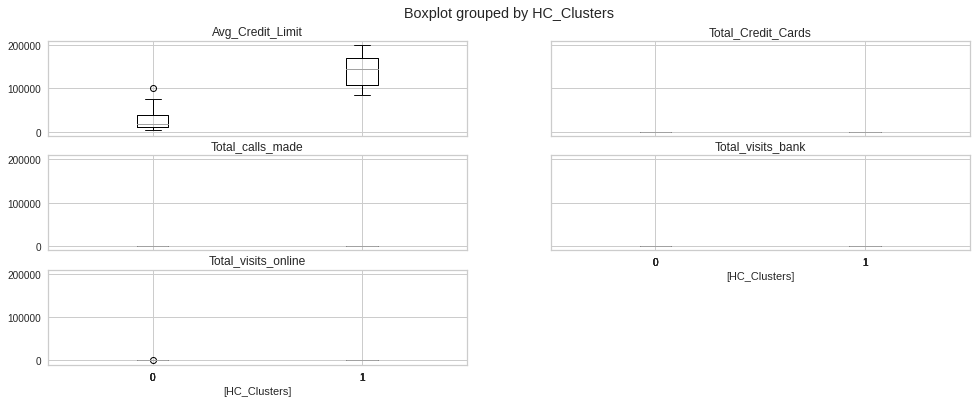

In [38]:
dfH.boxplot(by='HC_Clusters', layout=(3,2), figsize=(16,6))

#K-Means vs. Hierarchical#

- Both methods provide us useful cluster profiles to orient business practices around based on the features selected in the clusters.
- Since K-Means gave us 3 clusters as opposed to the 2 we found with Hierarchical clustering, we ended up with more groups with separate features to target in each group.
- Both models scored well and both interpretations of the dataset seem valid enough to make suggestions to the business with.

## Insights


- *K-Means*
  - **Cluster 0**
   - Largest cluster found in this method.
   - Selected for total visits to the bank, so this data point was the most important feature for this group.
   - Can possibly be targeted as a demographic for real traffic to the bank and in-person marketing.
  - **Cluster 1**
   - Second largest cluster in the set.
   - Made the most calls, so this can be interpreted as the group having a proclivity towards technical difficulties with the bank or a desire to speak with a representative over the phone. The bank can target the group by taking this into account and trying to address the most common issues observed from these calls proactively.
  - **Cluster 2**
   - Smallest group, but most features selected with the 3 remaining columns.
   - Tended towards online use, higher credit limits, and higher numbers of cards. This correlation may be valuable to the bank and seems like a plausible category of customer.
   - May be targeted with improved online services, electronic marketing, and promotions around the credit cards.
- *Hierarchical*
  - **Cluster 0**
   - Largest group found with this method.
   - The features selected were bank visits and calls made, can possibly build a demographic model from this group and target this demographic with telemarketing and in-person marketing/sales strategies.
  - **Cluster 1**
   - Smallest group, but selected for the remaining features which were the same as cluster 2 in K-Means.
   - Due to the commonality with the other clustering method on this cluster, this may be the strongest demographic profile that we have developed despite the small size. May be wise to try the same strategy described in Cluster 2 above for K-Means.


## Recommendations

**Cluster 2 in both the K-Means profile and Hierarchical cluster profile may be the 2 best groups to start with. May be valuable to do further analysis on these two clusters that were built and see how much overlap there is between the two since they come from the same set but different methods. Would recommend targeting these groups with credit card promotions, rewards for their high credit limit accounts, and targeting them directly through the site. Electronic marketing and sales may be the best method to keep these customers active, may also be worth investing the time to see if this profile can be extrapolated to potential customers that may seem to fit in these clusters if they were added to the set.**